In [1]:
import pandas as pd
import os
import pandas as pd
from GrBinaryIPF import GrBinaryIPF
import math
import matplotlib.pyplot as plt
import numpy as np

fpath =  "data/GermanCredit_new.csv"

In [2]:
data = pd.read_csv(fpath)

In [3]:
data.head()

,id,DurationMonth,CreditAmount,score,sex,age35,protected
0,0,0.029412,0.949433,0.600715,1,0,2
1,1,0.647059,0.686310,0.496131,0,1,3
2,2,0.117647,0.898426,0.506866,1,0,2
3,3,0.558824,0.580059,0.599482,1,0,2
4,4,0.294118,0.745791,0.550060,1,0,2


In [4]:
rank = np.argsort(data["score"])

In [5]:
group = data["protected"]

In [6]:
set(group)

{1, 2, 3, 4}

In [7]:
itemList = set(rank)

In [8]:
G1 = []
G2 = []
G3 = []
G4 = []
for i in range(0,len(itemList)):
    if(group[i] == 1):
        G1.append(group[i])
    elif(group[i] == 2):
        G2.append(group[i])
    elif(group[i] == 3):
        G3.append(group[i])
    else:
        G4.append(group[i])

In [9]:
p1 = len(G1)/len(itemList)
p2 = len(G2)/len(itemList)
p3 = len(G3)/len(itemList)
p4 = len(G4)/len(itemList)

In [10]:
A = ['1','2','3','4']

In [11]:
P = {'1':p1,'2':p2,'3':p3,'4':p4}

In [12]:
S={}
for a in A:
   
    scoreList = []
    
    S[a] = scoreList

In [13]:
score = len(rank)
for i in rank:
    if group[i] == 1:
        S[A[0]].append((score,i))
    if group[i] == 2:
        S[A[1]].append((score,i))
    if group[i] == 3:
        S[A[2]].append((score,i))
    else:
        S[A[3]].append((score,i)) 
    score = score - 1

In [14]:
def swap(dict,i,j):
    item = dict[i]
    dict[i] = dict[j]
    dict[j] = item 

In [15]:
def DetConstSort(S,A,P,kmax):
    counts = {}
    minCounts = {}
    for ai in A:
        counts[ai] = 0
        minCounts[ai] = 0
    
    rankedAttList = {}
    rankedScoreList = {}
    maxIndices = {}
    lastEmpty = 0
    k = 0
    
    while lastEmpty <= kmax:
        k = k + 1
        tempMinCounts = {}
        for ai in A:
            tempMinCounts[ai] = math.floor(k * P[ai])
        changedMins = []
        for ai in A:
            if minCounts[ai ] < tempMinCounts[ai]:
                #print(ai,counts[ai])
                changedMins.append((S[ai][counts[ai]],ai))
        if len(changedMins) != 0 :
            changedMins.sort(reverse=True)
            #ordChangedMins = changedMins
        for sai,ai in  changedMins:
            rankedAttList[lastEmpty] = ai
            
            rankedScoreList[lastEmpty] = S[ai][counts[ai]]
            maxIndices[lastEmpty] = k
            start = lastEmpty
            while start > 0 and maxIndices[start - 1] >= start and rankedScoreList[start-1][0] < rankedScoreList[start][0]:
                swap(maxIndices,start - 1,start)
                swap(rankedAttList,start - 1, start)
                swap(rankedScoreList,start - 1, start)
                start = start - 1
            counts[ai] = counts[ai] + 1 
            lastEmpty = lastEmpty + 1
        minCounts = tempMinCounts
    return (rankedAttList, rankedScoreList)

In [16]:
kmax = len(rank) - 1
rankedAttList,rankedScoreList = DetConstSort(S,A,P,kmax)

In [17]:
detOut = []
for key in rankedScoreList.keys():
    detOut.append(rankedScoreList[key][1])

In [18]:
P = {'1':p1,'2':p2,'3':p3,'4':p4}

In [19]:
P

{'1': 0.335, '2': 0.355, '3': 0.213, '4': 0.097}

In [20]:
import pandas as pd
import random
import math

import networkx as nx
import networkx as nx
from networkx.algorithms import bipartite
import random
import math


df = pd.read_csv('data/GermanCredit_new.csv')
numberOfItem = 25

genre = df['protected'][0:numberOfItem]
allGenre = []
allgroup = []
for g in genre:
    if g not in allGenre:
        allGenre.append(g)
    allgroup.append(allGenre.index(g))

movieId  = df['id'][0:numberOfItem]
score =  df['score'][0:numberOfItem]


rankScore = []
for i in range(0,len(movieId)):
    rankScore.append((score[i],movieId[i],allgroup[i]))

rankScore.sort(reverse=True)



movieIdDic = {}
rank = []
i = 1
group = []
for item in rankScore:
    rank.append(i)
    group.append(item[2])
    movieIdDic[item[1]+1] = i
    i = i + 1


# rank = rank[0:200]
# group = group[0:200]


numberOfItem = len(rank)

rankGrp = {}
for i in range(0, len(rank)):
    rankGrp[rank[i]] = group[i]

grpCount = {}
for i in group:
    grpCount[i] = 0

rankGrpPos = {}
for i in rank:
    grpCount[rankGrp[i]] = grpCount[rankGrp[i]] + 1
    rankGrpPos[i] = grpCount[rankGrp[i]]

rankRange = {}

delta = 0
for item in rank:
    i = rankGrpPos[item]
    n = numberOfItem
    fp = grpCount[rankGrp[item]]
    # r1 = math.floor((i-1) * n / fp)+1
    # r2 = math.ceil(i * n / fp)

    r1 = math.floor((i - 1 - delta) * n / fp) + 1
    r2 = math.ceil((i + delta) * n / fp)

    if r1 < 0:
        r1 = 0

    if r2 > numberOfItem:
        r2 = numberOfItem
    rankRange[item] = (r1, r2)

B = nx.Graph()
top_nodes = []
bottom_nodes = []

for i in rank:
    top_nodes.append(i)
    bottom_nodes.append(str(i))
B.add_nodes_from(top_nodes, bipartite=0)
B.add_nodes_from(bottom_nodes, bipartite=1)

for i in rank:
    r1, r2 = rankRange[i]
    # print(r1,r2)
    for j in range(1, numberOfItem + 1):
        if j >= r1 and j <= r2:
            # print(i,j)
            B.add_edge(i, str(j), weight=abs(i - j))

my_matching = nx.algorithms.bipartite.minimum_weight_full_matching(B, top_nodes, "weight")

print(my_matching)

rank1 = []
rank2 = []
for i in range(0, numberOfItem):
    rank2.append(0)

for i in range(1, numberOfItem + 1):
    # print(my_matching[i])
    rank1.append(i)
    rank2[int(my_matching[i]) - 1] = i

inputRank = []
fairRank = []

for i in range(0, numberOfItem):
    rn1 = rank1[i]
    rn2 = rank2[i]
    inputRank.append(movieIdDic[rn1])
    fairRank.append(movieIdDic[rn2])





import itertools

items = []
for i in range(1,len(inputRank)):
    items.append(i)
combinations = [p for p in itertools.product(items, repeat=2)]
print(len(combinations))



def KendallTau(P,Q,combinations):

    distance = 0
    for tup in combinations:
        if int(P[tup[0]]) < int(P[tup[1]]) and  int(Q[tup[1]]) < int(Q[tup[0]]):
            distance = distance + 1
    return distance

P = {}
Q = {}

for i in range(0,len(inputRank)):
    P[inputRank[i]] = i
    Q[fairRank[i]] = i

distance = KendallTau(P,Q,combinations)
print(distance)

{1: '1', 2: '2', 3: '4', 4: '6', 5: '8', 6: '9', 7: '11', 8: '5', 9: '13', 10: '7', 11: '3', 12: '12', 13: '15', 14: '17', 15: '10', 16: '18', 17: '20', 18: '22', 19: '24', 20: '19', 21: '16', 22: '14', 23: '21', 24: '23', 25: '25', '1': 1, '2': 2, '4': 3, '6': 4, '8': 5, '9': 6, '11': 7, '5': 8, '13': 9, '7': 10, '3': 11, '12': 12, '15': 13, '17': 14, '10': 15, '18': 16, '20': 17, '22': 18, '24': 19, '19': 20, '16': 21, '14': 22, '21': 23, '23': 24, '25': 25}
576
34


In [21]:
res = pd.read_csv("Fig_4b_result.csv")
x = list(res.iloc[0, :])
y = list(res.iloc[1, :])

In [22]:
A

['1', '2', '3', '4']

In [23]:
Rout = []

In [24]:
# sumFail = 0
# count = {'1':0,'2':0,'3':0,'4':0}
# x_detConst = []
# y = []
# A = ['1','2','3','4']
# totalViolates = 0
# for i in Rout:
#     itemGrp = group[i]
#     count[str(itemGrp)] = count[str(itemGrp)] + 1
    
#     violates = False
#     n = i + 1
#     for j in A:
#         bot = math.floor(n*P[j])
#         top = math.ceil(n*P[j])
#         #print(j,bot,top)
#         if (count[j] > top ):
#             violates = True
#     if violates == True:
#         totalViolates = totalViolates + 1
#     #print(n,totalViolates)
    
#     x_detConst.append((n-totalViolates)/n*100)
#     print('pfairness satisfied by ApproxMultiValuedIPF = ',n,(n-totalViolates)/n*100)

In [25]:
# P={}
# Q = {}
# #Rout.append(8)
# import itertools
# allids = []
# for i in range(0,len(Rout)):
#     allids.append(i)
    
# for i in range(0, len(Rout)):
#     P[Rout[i]] = i
#     Q[rank[i]] = i

# KendallTau(P,Q,allids)

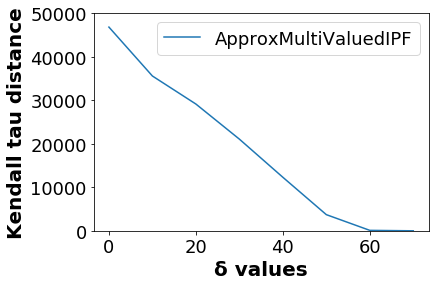

In [26]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(nrows=1, ncols=1)


plt.plot(x,y)
#plt.plot(x,z)
# create an index for each tick position

plt.ylabel('Kendall tau distance',fontweight='bold',fontsize=20)
plt.xlabel('\u03B4 values',fontweight='bold',fontsize=20)


plt.ylim([0, 50000])

plt.legend(["ApproxMultiValuedIPF"],fontsize=18)
#fig.savefig("newfig/fig_4/new/ApproxMultiValuedIPF_vary_delta_german.png", bbox_inches='tight', dpi=480)
plt.show()